In [1]:
import numpy as np
import matplotlib.pyplot as plt
from methods import *
from scipy.integrate import RK23, RK45

a) Legendre Collocation Method

Text(0, 0.5, 'Relative error')

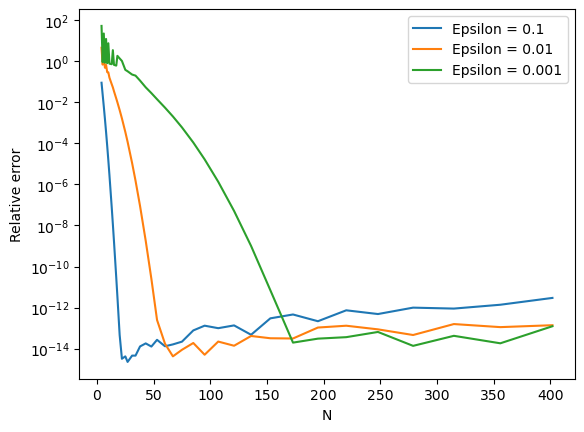

In [3]:
def true_u(x,eps):
    return (np.exp(-x/eps)+(x-1)-np.exp(-1/eps)*x)/(np.exp(-1/eps)-1)
true_u = np.vectorize(true_u)
plot_approximations = False
epsilons = [0.1,0.01,0.001]
Ns = [10,20,50,100,200,500]
Ns = np.ceil(np.logspace(0,2.6,50))+3
rel_err = []
for eps in epsilons:
    for N in Ns:
        N = int(N)
        xGL = JacobiGL(0,0,N)
        ys = (xGL+1)/2
        dV = GradJacobiP(xGL,0,0,N,matrix=True)
        V = JacobiP(xGL,0,0,N,matrix=True).T
        Vi = np.linalg.inv(V)
        D = dV@Vi*2
        # if N == 10:
        #     print(D)
        #D = Dmatrix_Legendre(N,xGL,0,1)
        LN = -eps*D@D-D
        LN[0,:] = np.concatenate(([1],np.zeros(N)))
        LN[-1,:] = np.concatenate((np.zeros(N),[1]))
        f_tilde = np.concatenate(([0],np.ones(N-1),[0]))
        u_hat = np.linalg.solve(LN,f_tilde)
        rel_err.append(np.linalg.norm(u_hat-true_u(ys,eps))/(np.linalg.norm(true_u(ys,eps))))
        if N == 20 and plot_approximations:
            plt.figure()
            fine_grid = (JacobiGL(0,0,500)+1)/2
            plt.plot(fine_grid,true_u(fine_grid,eps), label="True solution")
            plt.plot(ys,u_hat,'o',label="Approximation")
            plt.xlabel("x")
            plt.title(f"Epsilon = {eps}")
            plt.legend()
plt.figure()
plt.semilogy(Ns,rel_err[0:len(Ns)],label=f"Epsilon = {epsilons[0]}")
plt.semilogy(Ns,rel_err[len(Ns):2*len(Ns)],label=f"Epsilon = {epsilons[1]}")
plt.semilogy(Ns,rel_err[2*len(Ns):(3*len(Ns))],label=f"Epsilon = {epsilons[2]}")
plt.legend()
plt.xlabel("N")
plt.ylabel("Relative error")

Legendre Tau Method

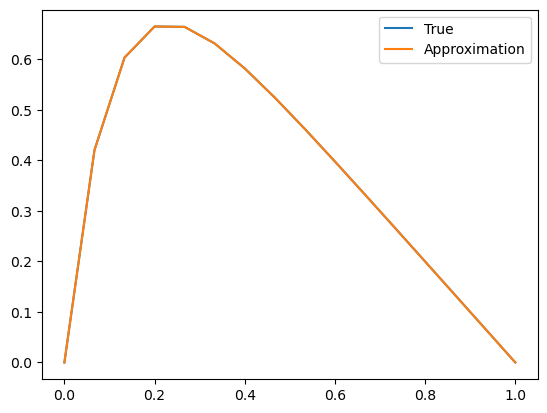

In [4]:
m = 16
#X = np.arange(m)/m*2 - 1
X = np.linspace(0,1,m)
eps = 0.1
testsol = LTM_2ord((X*2)-1, m, -eps*4, -2,None)

plt.figure
plt.plot(X,true_u(X,eps),label="True")
plt.plot(X,testsol,label="Approximation")
plt.legend()
plt.show()

Part b)

Text(0, 0.5, 'Relative error')

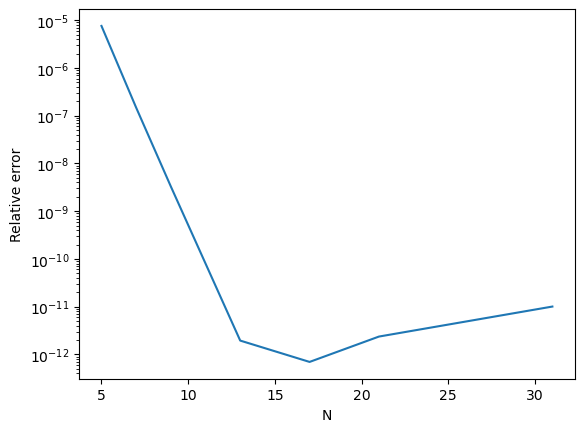

In [138]:
def true_phi(r,theta):
    return (r+1/r)*np.cos(theta)

plot_example = False
rel_errors = []
Ns = np.array([4,6,8,12,16,20,30])
Ns = Ns+1 # Need uneven for our Fourier matrix to work
for N in Ns:
    
    ### r - direction
    x_r = JacobiGL(0,0,N-1) 
    X_r = (x_r+3)/2
    D_r = Dmatrix_Legendre(N-1,x_r,1,2)

    ### theta - direction
    x_theta = [2*np.pi*j/(N-1) for j in range(N-1)] 
    X_theta = np.concatenate([x_theta,[2*np.pi]]) # Include boundary point
    D_theta = Dmatrix_Fourier(N-1,x_theta)
    D_theta = np.vstack([D_theta,D_theta[0]])
    D_theta = np.c_[D_theta,np.zeros(N)] # again to include boundary point

    ### 2d matrices
    Dtheta_2d = np.kron(D_theta,np.identity(N))
    Dr_2d = np.kron(np.identity(N),D_r)
    I_r = np.kron(np.identity(N),np.diag(1/X_r))
    LN = I_r@Dr_2d + Dr_2d@Dr_2d + I_r@I_r@Dtheta_2d@Dtheta_2d
    RHS = np.zeros(N**2)
    
    ### Boundary conditions
    for i in range(N):
        index = N*i
        b1 = np.zeros(N**2)
        b1[index] = 1
        LN[index,:] = b1
        RHS[index] = 2*np.cos(X_theta[i])
        ##
        index = (N-1) + N*i
        b1 = np.zeros(N**2)
        b1[index] = 1
        LN[index,:] = b1
        RHS[index] = 2.5*np.cos(X_theta[i])
        ##
        index = i
        b1 = np.zeros(N**2)
        b1[index] = 1
        LN[index,:] = b1
        RHS[index] = X_r[i]+1/X_r[i]
        ##
        index = (N-1)*N + i
        b1 = np.zeros(N**2)
        b1[index] = 1
        LN[index,:] = b1
        RHS[index] = X_r[i]+1/X_r[i]

    u_hat = np.linalg.solve(LN,RHS)
    r,theta = np.meshgrid(X_r, X_theta)
    true_sol = true_phi(r,theta)
    u_hat = u_hat.reshape((N,N))
    rel_errors.append(np.linalg.norm(true_sol - u_hat)/np.linalg.norm(true_sol))
    if N == 6 and plot_example:
        print("rel error")
        print(np.linalg.norm(true_sol - u_hat)/np.linalg.norm(true_sol))
        print("True")
        print(true_sol)
        print("Uhat")
        print(u_hat)
    
plt.figure()
plt.semilogy(Ns,rel_errors)
plt.xlabel("N")
plt.ylabel("Relative error")

Part 2) IVP

bound given by RK3: 0.00046756756756756755


c:\ProgramData\miniconda3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\ProgramData\miniconda3\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 640x480 with 0 Axes>

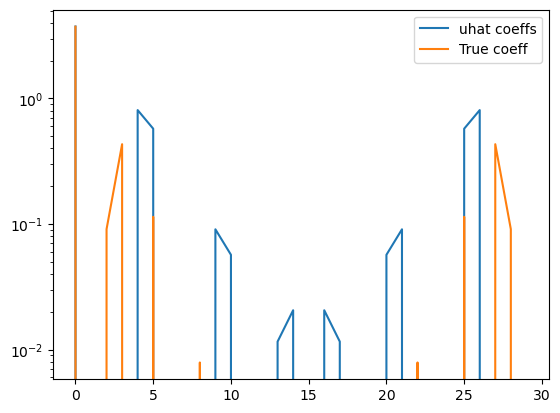

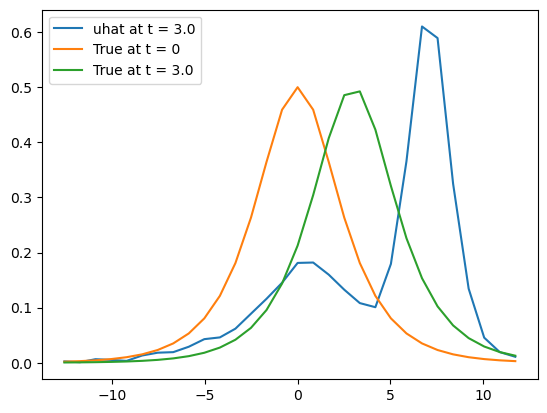

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from methods import *
from scipy.integrate import RK23, RK45, solve_ivp

def sech(x):
    return 2*np.exp(x)/(np.exp(2*x)+1)

def true_u(x,t,c,x0):
    return 1/2*c*sech(1/2*np.sqrt(c)*(x-c*t-x0))
true_u = np.vectorize(true_u)

def Dealias_orzag(u, v):
    uhat = np.fft.fft(u)
    vhat = np.fft.fft(v)
    N = len(uhat)
    M = len(vhat)
    uhatpad = np.concatenate((uhat[:N//2], np.zeros(M - N), uhat[N//2:]))
    vhatpad = np.concatenate((vhat[:N//2], np.zeros(M - N), vhat[N//2:]))
    upad = np.fft.ifft(uhatpad)
    vpad = np.fft.ifft(vhatpad)
    wpad = upad * vpad
    wpad_hat = np.fft.fft(wpad)
    what = 3/2 * np.concatenate((wpad_hat[:N//2], wpad_hat[M - N//2:M]))
    return np.fft.ifft(what).real

def Dealias_IC(true_sol,N):
    uf = np.fft.fft(true_sol)
    truncated_uf = np.zeros_like(uf)
    truncated_uf[:N] = uf[:N]

    # Perform the inverse Fourier transform
    truncated_u = np.fft.ifft(truncated_uf).real
    return truncated_u

Ns = [30]#,30]
dealias_orzag = True
dealias_IC = False
plot_error = False
plot_coeff = True
for N in Ns:
    plt.figure()
    for c in [1]:#[0.25,0.5,1]:
        max_errors = []
        norm_errors = []
        xx = [j*np.pi*8/N-4*np.pi for j in range (N)]
        xx_2pi = [j*np.pi*2/N for j in range (N)]
        Dx = Dmatrix_Fourier(N,xx_2pi)*0.25

        def RHS(t,u):
            if dealias_orzag:
                w = Dealias_orzag(u,Dx@u)
                return -(6*w+Dx@Dx@Dx@u)
            else:
                return -(6*u*Dx@u+Dx@Dx@Dx@u)

        def max_step(alpha,N,c):
            return alpha*1.73/(N**3/8-3*N*0.5*c)

        x0 = np.zeros(N)
        t0 = 0
        tf = 3
        if dealias_IC:
            xx_new = [j*np.pi*8/N*500-4*np.pi for j in range (N*500)]
            y0 = Dealias_IC(true_u(xx_new,t=t0,c=c,x0=np.zeros(N*500)),N)
            print(y0)
        else:
            y0 = true_u(xx,t=t0,c=c,x0=x0)
        MAX_step = max_step(alpha=0.9,N=N,c=c)
        print(f"bound given by RK3: {MAX_step}")

        #time_solver = RK23(RHS,t0=0,y0=y0,t_bound=0.1,vectorized=True)
        sol = solve_ivp(RHS,t_span=[t0,tf],y0=y0,method="RK23",max_step=MAX_step)
        times = sol.t
        uhat = sol.y


        if plot_error:
            for i in range(len(times)):
                true = true_u(xx,t=times[i],c=c,x0=x0)
                max_errors.append(np.max(true-uhat[:,i]))
                norm_errors.append(np.linalg.norm(true-uhat[:,i]))
            plt.plot(times,max_errors,label=f"max error with c = {c}")
            plt.plot(times,norm_errors,label=f"2-norm error with c = {c}")
            plt.xlabel("Time")
            plt.ylabel("Error")
            plt.legend()

        if plot_coeff:
            # N_new = 100*N
            # xx_fine = [j*np.pi/(N_new)-4*np.pi for j in range (N_new)]
            # coef_errors = []
            plt.figure()
            true = true_u(xx,t=times[-1],c=c,x0=np.zeros(N))
            true_coeff = np.fft.fft(true)
            uhat_coeff = np.fft.fft(uhat[:,-1])
            plt.semilogy(uhat_coeff,label="uhat coeffs")
            plt.semilogy(true_coeff,label="True coeff")
            plt.legend()
        

    plt.figure()
    time_count = len(times)-1
    time_choose = times[time_count]
    #plt.plot(xx,uhat[:,0],"--",label=f"uhat at t = {t0}")
    plt.plot(xx,uhat[:,time_count],label=f"uhat at t = {time_choose}")
    plt.plot(xx,true_u(xx,t=t0,c=1,x0=x0),label=f"True at t = {t0}")
    plt.plot(xx,true_u(xx,t=time_choose,c=1,x0=np.zeros(N)),label=f"True at t = {time_choose}")
    plt.legend()
